## Shifted Sphere (F1) with Dimension 500

In [12]:
import numpy as np
import pandas as pd
from scipy.optimize import minimize
import matplotlib.pyplot as plt
import time

In [13]:
dataset = pd.read_csv("sphere_dataset_data.csv")
sphere_dataset = dataset["val"].tolist()

In [14]:
Dims = 500
bias = -450
lower_bound = -100
upper_bound = 100
solution_list = []

In [15]:
# Shifted Sphere Function as given in the cec2008 tech report
def define_function(x, data=sphere_dataset, dim=Dims, f_bias=bias):
    Function = 0
    for i in range(dim - 1):
        z = x[i] - data[i]
        Function += z**2
    result = Function + f_bias
    return result

In [16]:
# Solution Compiler
def solution_set(allsol):
    solution_result = define_function(allsol)
    solution_list.append(solution_result)
    return solution_result

In [17]:
# Solution Computer
def compute_solution(dimension, lower_bound, upper_bound):
    global sol
    xmin = lower_bound * np.ones(dimension)
    xmax = upper_bound * np.ones(dimension)
    x0 = np.random.uniform(min(xmin), max(xmax), dimension)
    
    # Minimizing the function using BFGS algorithm (Scipy)
    sol = minimize(solution_set, x0, bounds=(lower_bound, upper_bound), method='BFGS', callback=solution_set)
    return sol, solution_list

In [18]:
# Initial Time
start_time = time.time()

In [19]:
# computing the problem
compute_solution(Dims, lower_bound, upper_bound)

d:\anaconda\anacondacore\envs\mytfenv\lib\site-packages\scipy\optimize\_minimize.py:534: RuntimeWarning: Method BFGS cannot handle constraints nor bounds.
  RuntimeWarning)


(      fun: -449.9999999989449
  hess_inv: array([[ 9.99798394e-01,  2.77166526e-04, -1.67056233e-04, ...,
          6.26195397e-04, -5.36070822e-04,  0.00000000e+00],
        [ 2.77166526e-04,  9.98774600e-01,  1.24761594e-03, ...,
          1.98480602e-05,  3.44898215e-04,  0.00000000e+00],
        [-1.67056233e-04,  1.24761594e-03,  9.98634340e-01, ...,
         -5.42930397e-04,  2.84973446e-05,  0.00000000e+00],
        ...,
        [ 6.26195397e-04,  1.98480602e-05, -5.42930397e-04, ...,
          9.97136320e-01,  2.07404322e-03,  0.00000000e+00],
        [-5.36070822e-04,  3.44898215e-04,  2.84973446e-05, ...,
          2.07404322e-03,  9.98392511e-01,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  1.00000000e+00]])
       jac: array([ 0.00000000e+00,  0.00000000e+00, -7.62939453e-06, -3.81469727e-06,
         0.00000000e+00,  3.81469727e-06,  0.00000000e+00,  0.00000000e+00,
         3.81469727e-06, 

In [20]:
# End Time and computing time
end_time = time.time()
computation_time = end_time - start_time

In [21]:
# Displaying Parameters and Insights
print("Function_Name: Shifted sphere\n")
print("01. Chosen algorithm: BFGS (SciPy)\n")
print("02. Parameters of the Algorithm:")
print("\nDimension:", Dims)
print("\nLower and Upper Bounds: [", lower_bound, ",", upper_bound, "]")
print("\nBias:", bias)
print("\n03. Result:")
sol_df = pd.DataFrame(sol.x, columns=[''])
sol_df.to_csv("sphere500.csv", sep=",")
print("\n    - Solutions:", sol_df)
print("\n    - Fitness:", round(sol.fun, 2))
print("\nNumber of function evaluations:", sol.nfev)
print("\nStopping criterion:", sol.nit, "iterations")
print("\nComputational time:", round(computation_time, 2), "seconds\n")

Function_Name: Shifted sphere

01. Chosen algorithm: BFGS (SciPy)

02. Parameters of the Algorithm:

Dimension: 500

Lower and Upper Bounds: [ -100 , 100 ]

Bias: -450

03. Result:

    - Solutions:               
0    97.249935
1    77.060984
2   -19.031153
3    25.428696
4   -22.908803
..         ...
495 -70.131730
496 -17.071781
497 -86.203053
498  76.838810
499 -63.445987

[500 rows x 1 columns]

    - Fitness: -450.0

Number of function evaluations: 5511

Stopping criterion: 5 iterations

Computational time: 3.24 seconds



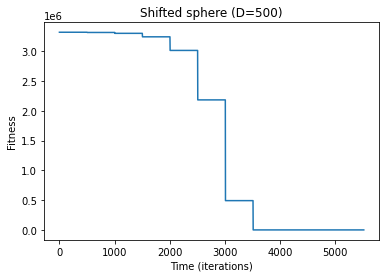

In [23]:
# Plotting function
def fitness_curve(solution):
    plt.plot(solution)
    plt.title("Shifted sphere (D=500)")
    plt.xlabel("Time (iterations)")
    plt.ylabel("Fitness")
    plt.show()
fitness_curve(solution_list)